In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # shows all columns

# Mexico COVID-19 clinical data

## 1. Data

<p>This aim of this analysis is to predict whether a patient with certain clinical record attributes will test positive or not for COVID-19 by RT-PCR test. The data is obtained from the Directorate of Epidemiology in Mexico. More info on sources and preprocessing here.</p>

In [2]:
data = pd.read_csv('../mexico_covid19.csv')

In [3]:
data.describe()

,id,ENTIDAD_UM,ENTIDAD_RES,RESULTADO,DELAY,ENTIDAD_REGISTRO,ORIGEN,SECTOR,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,NACIONALIDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,MIGRANTE,UCI
count,2.643180e+05,264318.000000,264318.000000,264318.000000,264318.0,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264312.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000,264318.000000
mean,2.941769e+06,14.839432,15.123068,1.609947,0.0,15.087221,1.635416,9.596588,1.510828,19.706490,36.408703,1.236749,74.508369,1.842795,42.599562,1.007514,50.723118,4.578742,2.238921,2.319513,2.300150,2.359196,2.173484,2.452943,2.324318,2.184043,2.320345,2.267466,32.365223,98.593119,74.505989
std,2.211682e+06,8.002136,7.905286,0.487763,0.0,7.916384,0.481314,7.272160,0.499884,19.411755,48.089297,0.425088,40.401569,0.797492,16.900972,0.086355,47.494408,15.638799,5.952113,5.699440,5.677423,6.018462,5.740056,6.843428,5.790736,5.812009,5.723993,5.861993,45.382444,6.279802,40.406759
min,1.000000e+00,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.660092e+05,9.000000,9.000000,1.000000,0.0,9.000000,1.000000,4.000000,1.000000,9.000000,7.000000,1.000000,97.000000,2.000000,31.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,99.000000,97.000000
50%,2.726962e+06,14.000000,15.000000,2.000000,0.0,15.000000,2.000000,12.000000,2.000000,15.000000,19.000000,1.000000,97.000000,2.000000,41.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
75%,4.786556e+06,21.000000,21.000000,2.000000,0.0,21.000000,2.000000,12.000000,2.000000,24.000000,48.000000,1.000000,97.000000,2.000000,53.000000,1.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,99.000000,97.000000
max,7.277125e+06,32.000000,32.000000,2.000000,0.0,32.000000,2.000000,99.000000,2.000000,99.000000,999.000000,2.000000,99.000000,99.000000,120.000000,2.000000,98.000000,99.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,99.000000,99.000000


## 2. Preprocess

<p>We will use columns already factored with numeric values and will remove columns that aren't relevant.<p>

In [4]:
# Make a copy of the data frame so that we don't override the original dataframe
df = data.copy()

In [5]:
# Take a glance at the variables
df.keys()

Index(['id', 'FECHA_ARCHIVO', 'ID_REGISTRO', 'ENTIDAD_UM', 'ENTIDAD_RES',
       'RESULTADO', 'DELAY', 'ENTIDAD_REGISTRO', 'ENTIDAD', 'ABR_ENT',
       'FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'SEXO', 'ENTIDAD_NAC',
       'MUNICIPIO_RES', 'TIPO_PACIENTE', 'FECHA_INGRESO', 'FECHA_SINTOMAS',
       'FECHA_DEF', 'INTUBADO', 'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO',
       'HABLA_LENGUA_INDIG', 'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR',
       'HIPERTENSION', 'OTRA_COM', 'CARDIOVASCULAR', 'OBESIDAD',
       'RENAL_CRONICA', 'TABAQUISMO', 'OTRO_CASO', 'MIGRANTE',
       'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [6]:
# Check dtypes for each column
# df.dtypes

In [7]:
# Exclude features as described above
df = df[df.columns[~df.columns.isin(
    ['id', 'ID_REGISTRO',
     'FECHA_ARCHIVO', 'FECHA_ACTUALIZACION', 'FECHA_DEF', 'FECHA_INGRESO','FECHA_SINTOMAS',
     'ABR_ENT', 'ENTIDAD', 'MIGRANTE', 'NACIONALIDAD', 'ORIGEN', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN',
     'INTUBADO', 'UCI'] # Remove features only available in hospital
)]]

In [8]:
df.keys()

Index(['ENTIDAD_UM', 'ENTIDAD_RES', 'RESULTADO', 'DELAY', 'ENTIDAD_REGISTRO',
       'SECTOR', 'SEXO', 'ENTIDAD_NAC', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'NEUMONIA', 'EDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO'],
      dtype='object')

In [9]:
# Various ways to check for NaN, NA and NULL
# df.isnull()
# df.isnull().sum()
# df.isnull().values.any()
# df.isnull().values.sum()
# df.isnull().any()

In [10]:
# There are a few rows without the city code attribute - so we should remove them
df = df[~df.isnull().any(axis=1)]

In [11]:
# We only have data that contains either negative or positive results (ie excludes ongoing tests)
print(df['RESULTADO'].unique())

[2 1]


In [12]:
# If we had more than two categories, we would have to remove them (the original data adds the factor `3``)
# df = df[df.RESULTADO != 3]

In [13]:
# Since we have binary target data, we should follow convention and refactor them (0=negative, 1=positive)
df['RESULTADO'] = df['RESULTADO'].astype(str).str.replace('2','0')
df['RESULTADO'] = df['RESULTADO'].astype(str).str.replace('1','1')

In [14]:
#df = df[~df.SECTOR.astype(str).str.startswith(('9'))]
#df = df[~df.ENTIDAD_NAC.astype(str).str.startswith(('9'))]
#df = df[~df.MUNICIPIO_RES.astype(str).str.startswith(('9'))]
#df = df[~df.INTUBADO.astype(str).str.startswith(('9'))]
#df = df[~df.NEUMONIA.astype(str).str.startswith(('9'))]
#df = df[~df.SECTOR.astype(str).str.startswith(('9'))]

In [15]:
# Convert whole df to numeric: stackoverflow.com/a/56458750/4848278
df = df.apply(pd.to_numeric, errors='ignore')

In [16]:
# We want every remaining column to be of numeric type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264312 entries, 0 to 264317
Data columns (total 25 columns):
ENTIDAD_UM            264312 non-null int64
ENTIDAD_RES           264312 non-null int64
RESULTADO             264312 non-null int64
DELAY                 264312 non-null int64
ENTIDAD_REGISTRO      264312 non-null int64
SECTOR                264312 non-null int64
SEXO                  264312 non-null int64
ENTIDAD_NAC           264312 non-null int64
MUNICIPIO_RES         264312 non-null float64
TIPO_PACIENTE         264312 non-null int64
NEUMONIA              264312 non-null int64
EDAD                  264312 non-null int64
EMBARAZO              264312 non-null int64
HABLA_LENGUA_INDIG    264312 non-null int64
DIABETES              264312 non-null int64
EPOC                  264312 non-null int64
ASMA                  264312 non-null int64
INMUSUPR              264312 non-null int64
HIPERTENSION          264312 non-null int64
OTRA_COM              264312 non-null int64
CARDIOV

## 2. Explore the features

### Create a target column
We are aiming to predict whether a patient with pending COVID-19 results will get a positive or a negative result:
<ul>
<li>As lab results are processed, this leaves a window when it's uncertain whether a result will return positive or negative (we are assuming that the epidemiology data can be infomative for the prediction).</li>
<li>Also, this could help predict for similar symptoms e.g. from a survey or an app that checks for similar data (ideally, containing most of the parameters that can be assessed without coming into the hospital, like e.g. age of the person.</li>
</ul>
<p>The value of the lab result comes from a RT-PCR, and is stored in <code>RESULTADO</code>, where <code>0 = NEGATIVE</code> and <code>1 = POSITIVE</code>. Let's rename this to <code>target</code> so that it's more convenient to work with.</p>

In [17]:
# Rename target column as 'target' for clarity
df.rename(
    columns={'RESULTADO': 'target'},
    inplace=True
)

In [18]:
# Remove target variable to move it to the first position of dataframe
col_name = 'target'
first_col = df.pop(col_name)

In [19]:
# Now we can use Pandas insert() function and insert the opped column into first position of the dataframe
# The first argument of insert() function is the location we want to insert, here it is 0
df.insert(0, col_name, first_col)

In [20]:
df.head()

,target,ENTIDAD_UM,ENTIDAD_RES,DELAY,ENTIDAD_REGISTRO,SECTOR,SEXO,ENTIDAD_NAC,MUNICIPIO_RES,TIPO_PACIENTE,NEUMONIA,EDAD,EMBARAZO,HABLA_LENGUA_INDIG,DIABETES,EPOC,ASMA,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO
0,0,25,25,0,25,12,2,25,13.0,1,2,74,97,2,1,2,2,2,1,2,2,1,2,2,2
1,0,14,14,0,14,4,1,16,98.0,2,2,71,2,2,1,1,2,2,1,2,2,1,2,1,99
2,1,8,8,0,8,4,2,8,19.0,2,1,50,97,2,2,2,2,2,2,2,2,2,2,2,99
3,1,9,15,0,9,4,1,15,33.0,1,2,25,2,2,2,2,2,2,2,2,2,1,2,2,99
4,0,9,9,0,9,4,1,99,15.0,1,2,28,2,2,2,2,2,2,2,2,2,2,2,2,99


In [21]:
len(data)

264318

### - Target incidence
<p>Target incidence is the number of cases of each individual target value in the data. It represents the proportion of categorical variable in a target column. Target incidence gives us an idea of how balanced (imbalanced) is our data.</p>

In [22]:
# Print target incidence proportions and round to 3 decimal places
df.target.value_counts(normalize=True).round(3)

0    0.61
1    0.39
Name: target, dtype: float64

### - Age distribution

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df_positive = df.loc[df['target'] == 0]
df_negative = df.loc[df['target'] == 1]

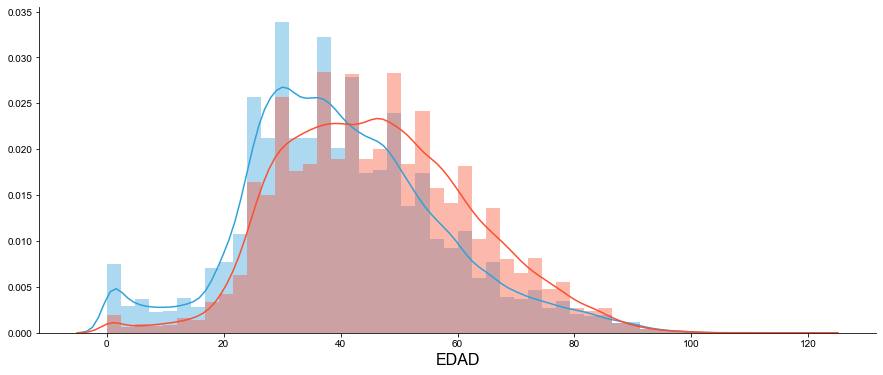

In [25]:
five_thirty_eight = [
    '#30a2da',
    '#fc4f30',
    '#e5ae38',
    '#6d904f',
    '#8b8b8b',
]

plt.figure(figsize = (15,6))
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

sns.set_palette(sns.color_palette(five_thirty_eight))

sns.distplot(df_positive['EDAD'])
sns.distplot(df_negative['EDAD'])

sns.set(style='ticks')
sns.despine()

### - Class imbalance for all features

<Figure size 432x288 with 0 Axes>

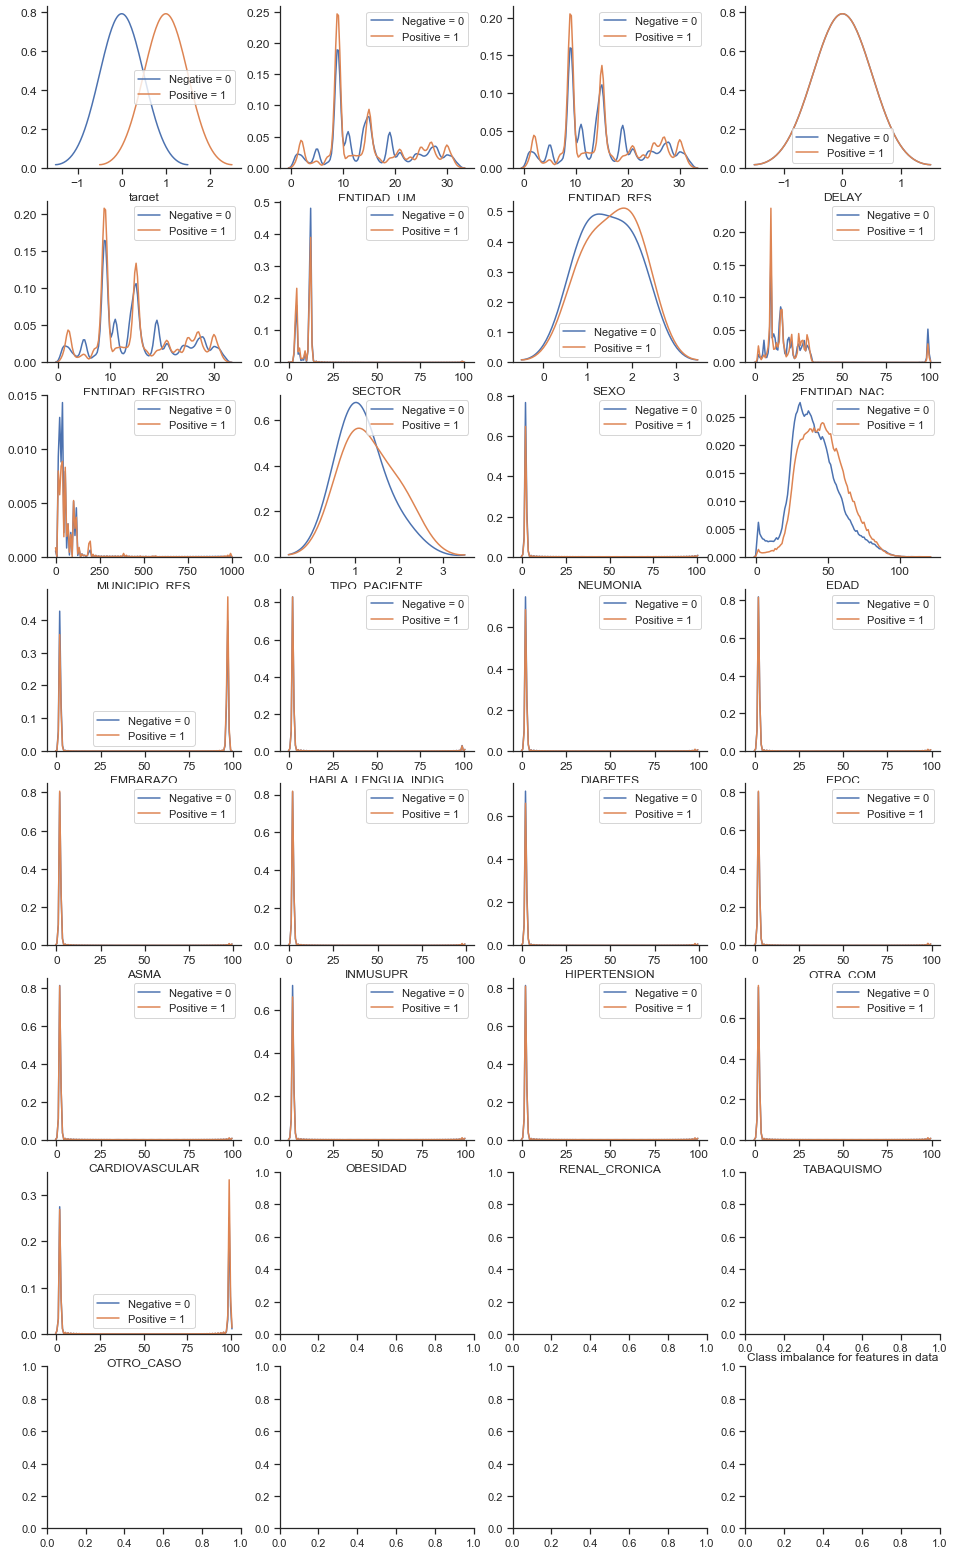

In [153]:
var = df.columns.values

i = 0
t0 = df.loc[df['target'] == 0]
t1 = df.loc[df['target'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))
plt.title('Class imbalance for features in data')

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5, label="Negative = 0")
    sns.kdeplot(t1[feature], bw=0.5, label="Positive = 1")
    sns.set_palette(sns.color_palette(five_thirty_eight))
    sns.set(style='ticks')
    sns.despine()
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

## 3. Model
<p>We want to predict whether or not a person with a certain clinical profile may result COVID-19 positive when tested for a real-time PCR. The model for this is a binary classifier, meaning that there are only 2 possible outcomes:</p>

<ul>
    <li><code>0</code> - the lab result is COVID-19 negative</li>
    <li><code>1</code> - the lab result is COVID-19 positive</li>
</ul>

<p>As laboratory results are processed, each pending patient record leaves a time window when it's uncertain whether a result will return positive or negative (we are assuming that the epidemiology data can be infomative for the prediction).</p>

<p>Also, this could help predict for similar symptoms e.g. from a survey or an app that checks for similar data (ideally, containing most of the parameters that can be assessed without coming into the hospital, like e.g. age of the patient).</p>

### 3.1 Split the data set

In [26]:
df_covid = df.copy()

In [27]:
df_covid.shape

(264312, 25)

In [28]:
X = df_covid.drop('target',axis=1)
y = df_covid.target

### 3.2 Split into the training set and test set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 3.3 LightGBM
Train taking the default values for the hyperparameters.

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [139]:
import lightgbm as lgb

# Instantiate model
lgg = lgb.LGBMClassifier()
lgg.fit(X_train,y_train.values.ravel())
print(lgg.score(X_test,y_test))

0.7040507478497743


In [142]:
# Predict the results
y_hat = lgg.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score

# View accuracy
accuracy = accuracy_score(y_hat, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_hat)))

LightGBM Model accuracy score: 0.7041


In [144]:
# Compare train and test set accuracy
y_hat_train = lgg.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_hat_train)))

Training-set accuracy score: 0.7076


In [145]:
# Check for overfitting
print('Training set score: {:.4f}'.format(lgg.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lgg.score(X_test, y_test)))

Training set score: 0.7076
Test set score: 0.7041


In [146]:
from sklearn.metrics import confusion_matrix

# Confussion matrix
cm = confusion_matrix(y_test, y_hat)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[40874  7779]
 [15688 14953]]

True Positives(TP) =  40874

True Negatives(TN) =  14953

False Positives(FP) =  7779

False Negatives(FN) =  15688


In [130]:
from sklearn.metrics import classification_report

# Classification metrics
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78     48653
           1       0.66      0.49      0.56     30641

    accuracy                           0.70     79294
   macro avg       0.69      0.66      0.67     79294
weighted avg       0.70      0.70      0.69     79294



### 3.4 Review
<p>Since we have too many false negatives let's try to fix that :(</p>

### 3.5 Improve model to reduce false negatives

In [105]:
# Predict probabilities
y_hat = lgg.predict_proba(X_test) # Use this instead of `predict()`so that we can retrieve probabilities
pos_probs = y_hat[:,1] # Retrieve just the probabilities for the positive class

### - ROC Curve

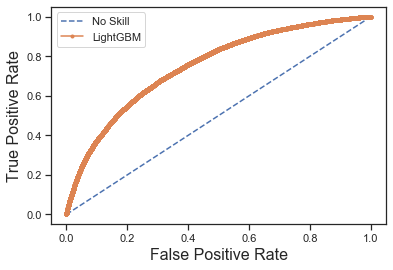

In [106]:
from sklearn.metrics import roc_curve

# Plot No Skill ROC Curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

# Calculate ROC Curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)

# Plot model ROC Curve
plt.plot(fpr, tpr, marker='.', label='LightGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

### - ROC Area Under Curve (AUC) Score

In [111]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import roc_auc_score

# Create No Skill classifier
dummy_model = DummyClassifier(strategy='stratified')
dummy_model.fit(X_train, y_train)
y_hat_dummy = dummy_model.predict_proba(X_test)
pos_probs_dummy = y_hat_dummy[:, 1]

# Calculate ROC AUC for No Skill
roc_auc = roc_auc_score(y_test, pos_probs_dummy)
print('No Skill ROC AUC %.3f' % roc_auc)

# Calculate ROC AUC for our model
roc_auc = roc_auc_score(y_test, pos_probs)
print('LightGBM ROC AUC %.3f' % roc_auc)

No Skill ROC AUC 0.499
LightGBM ROC AUC 0.751


### - Precision-Recall Curve

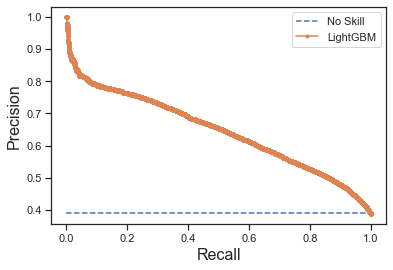

In [112]:
from sklearn.metrics import precision_recall_curve

# Calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1])/len(y)

# Plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# Calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

# Plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='LightGBM')

# Calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

# Call the plot
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

### - Precision-Recall AUC Score

In [113]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Calculate the Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, pos_probs_dummy)
auc_score = auc(recall, precision)
print('No Skill PR AUC: %.3f' % auc_score)

# Calculate the Precision-Recall AUC for our model
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
auc_score = auc(recall, precision)
print('LightGBM PR AUC: %.3f' % auc_score)

No Skill PR AUC: 0.506
LightGBM PR AUC: 0.646
